# Process an image

This process involves:

* Removing the "background" color
* Generating a quantized palette
* Creating quantized copy



In [1]:
import margo_loader
from utils.ImageFiles import read_img
from LightnessPixelFilter import LightnessPixelFilter
from MMCQExtractor import MMCQExtractor as Extractor

In [2]:
def process_image(img):
    
    lightness_filter = LightnessPixelFilter(0, 200)
    
    # remove the background
    nbg = lightness_filter.filter_image(img)
    
    # quantize the pixels
    extractor = Extractor(nbg)
    quantized = extractor.get_color_map()
    palette = extractor.get_palette()
    
    return {
        "no_background":nbg,
        "original":img,
        "palette":palette,
        "quantized":quantized
    }


# Demo

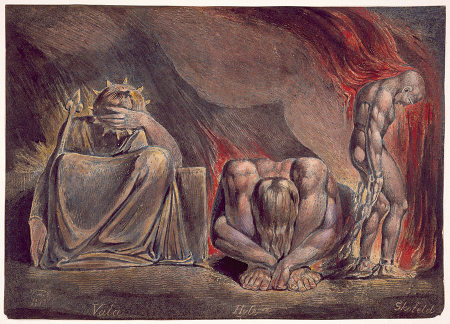

In [3]:
# :: ignore-cell ::

"""
Here's the unedited image, scaled down 50% to speed  up this demo
"""
from PIL import Image

Image.fromarray(read_img("../images/jerusalem.mpi.p22-51.100.jpg", scale=0.5))

In [4]:
# :: ignore-cell ::

"""
Here's the image after removing the background and quantizing
"""

result = process_image(read_img("../images/jerusalem.mpi.p22-51.100.jpg", scale=0.5))


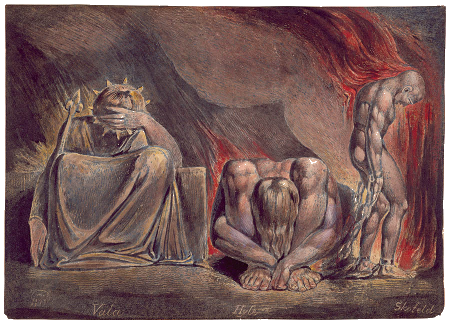

In [5]:
# :: ignore-cell ::

"""
Here's the image after subtracting the background, but without any quantization
"""

Image.fromarray(result["no_background"])

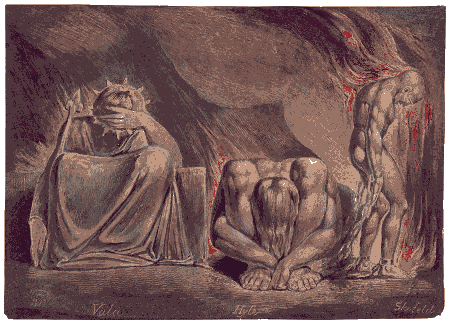

In [6]:
# :: ignore-cell ::

"""
Here's the image after subtracting the background and quantizing
"""
Image.fromarray(result["quantized"])

In [7]:
# :: ignore-cell ::

"""
Here's the resulting palette
"""
result["palette"].to_dict()

{'rgb(73,37,28)': 10,
 'rgb(150,67,42)': 27,
 'rgb(191,104,56)': 21,
 'rgb(96,82,92)': 1061,
 'rgb(184,55,57)': 80,
 'rgb(111,98,109)': 397,
 'rgb(151,44,48)': 619,
 'rgb(90,77,76)': 6630,
 'rgb(105,93,88)': 4306,
 'rgb(154,136,141)': 256,
 'rgb(103,74,72)': 17643,
 'rgb(48,17,39)': 3419,
 'rgb(66,25,45)': 4625,
 'rgb(167,150,135)': 1116,
 'rgb(122,87,80)': 22984,
 'rgb(127,111,102)': 5494,
 'rgb(78,54,60)': 38068,
 'rgb(152,114,101)': 23375,
 'rgb(193,152,129)': 8064}